<font size="+5">#08. Hyperparameter Tuning with Cross Validation</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - The goal of this dataset is
> - To predict if **bank's customers** (rows) `default` next month
> - Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(io=url, header=1, index_col=0)
df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
16106,220000,2,2,2,46,0,0,0,2,2,0,86957,85577,91266,88051,81803,79286,4000,12000,3100,0,2900,3000,1
25298,50000,2,2,1,24,0,0,0,0,0,0,48700,47544,47612,48713,49295,49916,2401,2440,2396,1368,1401,1807,0
18554,50000,2,1,2,25,0,0,2,0,0,0,40067,43099,42133,43127,44210,45844,4000,0,2000,1800,2500,5500,1
27375,20000,1,1,2,34,0,0,0,-2,-2,-2,19569,2700,0,0,0,0,1000,0,0,0,0,0,1
12876,10000,1,1,2,23,-1,2,-1,-1,-1,-2,780,390,390,780,0,0,0,390,780,0,0,0,1
6820,100000,1,1,1,44,0,0,0,0,0,0,37222,38628,39982,40914,42053,43151,2000,2000,1600,1800,1800,1700,0
20956,270000,1,2,1,44,2,0,0,0,0,0,187352,179247,180535,187524,185895,190396,8000,6700,10027,6700,7500,7000,1
6382,210000,2,2,1,42,1,-2,-2,-1,0,0,0,0,0,6622,6506,6511,0,0,6622,298,1000,1179,0
28357,170000,2,2,2,43,0,0,0,0,0,0,136113,137722,139384,141314,139252,139205,7000,7000,7000,5100,5300,5030,0


In [2]:
y=df['default payment next month']

In [3]:
X=df.drop(columns='default payment next month')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

# `DecisionTreeClassifier()` with Default Hyperparameters

In [6]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [7]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Accuracy

> In `train` data

In [8]:
model.score(X_train,y_train)

0.9995024875621891

> In `test` data

In [9]:
model.score(X_test, y_test)

0.7262626262626263

## Model Visualization

> - `plot_tree()`

In [10]:
from sklearn.tree import plot_tree

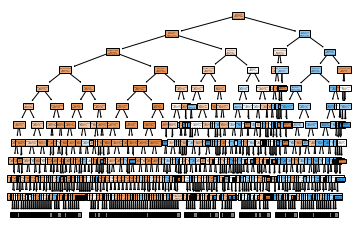

In [11]:
plot_tree(decision_tree=model, max_depth=10, feature_names=X.columns, filled=True);

# `DecisionTreeClassifier()` with Custom Hyperparameters

In [12]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> - The `model` has this hyperparameters ↓

In [13]:
model = DecisionTreeClassifier()

In [14]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## 1st Configuration

In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3)

In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

## Accuracy

> In `train` data

In [17]:
model.score(X_train,y_train)

0.8207960199004976

> In `test` data

In [18]:
model.score(X_test, y_test)

0.8222222222222222

## Model Visualization

> - `plot_tree()`

In [19]:
from sklearn.tree import plot_tree

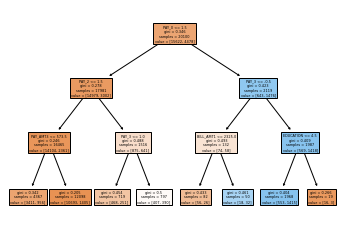

In [20]:
plot_tree(decision_tree=model, max_depth=10, feature_names=X.columns, filled=True);

## 2nd Configuration

In [21]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5)

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

## Accuracy

> In `train` data

In [23]:
model.score(X_train,y_train)

0.8248756218905473

> In `test` data

In [24]:
model.score(X_test, y_test)

0.8189898989898989

## Model Visualization

> - `plot_tree()`

In [25]:
from sklearn.tree import plot_tree

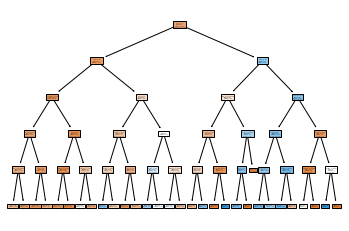

In [26]:
plot_tree(decision_tree=model, max_depth=10, feature_names=X.columns, filled=True);

## 3rd Configuration

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(min_samples_leaf=200)

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=200)

## Accuracy

> In `train` data

In [29]:
model.score(X_train,y_train)

0.8211940298507463

> In `test` data

In [30]:
model.score(X_test, y_test)

0.8186868686868687

## Model Visualization

> - `plot_tree()`

In [31]:
from sklearn.tree import plot_tree

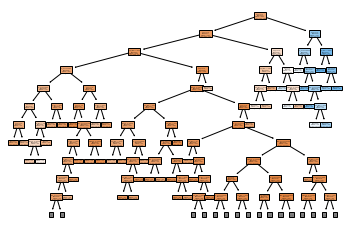

In [32]:
plot_tree(decision_tree=model, max_depth=10, feature_names=X.columns, filled=True);

## 4th Configuration

## 5th Configuration

# `GridSearchCV()` to find Best Hyperparameters

> - How many scores for each fold?

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
dt = DecisionTreeClassifier()

In [35]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [46]:
cv = GridSearchCV(estimator=dt, param_grid={'max_depth': [4,5,6,7,8,9,10]}, cv=5, verbose=2)

In [48]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=6; total time=   0.1s
[CV] END ........................................

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10]}, verbose=2)

In [49]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [50]:
cv.score(X_test, y_test)

0.8205050505050505

# Other Models

## Support Vector Machines `SVC()`

In [51]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [52]:
from sklearn.svm import SVC

In [53]:
sv = SVC()

In [54]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [56]:
cv = GridSearchCV(estimator=sv,param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.001], 'kernel': ['rbf']}, verbose=2)

In [57]:
sv.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [58]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  22.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  23.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  22.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  23.6s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=  23.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  20.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  20.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  20.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  20.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  20.3s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  21.4s
[CV] END .......................C=1, gamma=0.001,

KeyboardInterrupt: 

In [ ]:
cv.best_estimator_

## `KNeighborsClassifier()`

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.neighbors import KNeighborsClassifier
nb=KNeighborsClassifier()

In [48]:
nb.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Best Model with Best Hyperparameters